In [3]:
import os

In [4]:
parent_folders = os.listdir("../solvers")
parent_folders.remove("build")
parent_folders.remove("CMakeLists.txt")
parent_folders.remove("main.cpp")
parent_folders

['03InverseStronglyCorrelated',
 '10MultipleStronglyCorrelated',
 '05SubsetSum',
 '04AlmostStronglyCorrelated',
 '08SpannerWeaklyCorrelated',
 '06UncorrelatedWithSimilarWeights',
 '07SpannerUncorrelated',
 '09SpannerStronglyCorrelated',
 '00Uncorrelated',
 '12Circle',
 '11ProfitCeiling',
 '02StronglyCorrelated',
 '01WeaklyCorrelated']

In [5]:
import re

BASE_DIR = "../solvers"
data = {}
for parent_folder in parent_folders:
    data[parent_folder] = {}
    alias_1 = data[parent_folder]
    parent_folder = os.path.join(BASE_DIR, parent_folder)
    for case_n in os.listdir(parent_folder):
        alias_1[case_n] = {}
        alias_2 = alias_1[case_n]
        case_n = os.path.join(parent_folder, case_n)
        for case in os.listdir(case_n):
            alias_2[case] = []
            items = alias_2[case]
            case = os.path.join(case_n, case)
            for testfile in os.listdir(case):
                testfile = os.path.join(case, testfile)
                lines = open(testfile, "r").readlines()
                items.append({
                    "n": int(lines[0]),
                    "capacities": int(lines[1]),
                    "total_weight": int(lines[5]),
                    "total_value": int(lines[4]),
                    "is_optimal": int(lines[-1]),
                    "limit_time": int(re.sub("s", "", testfile.split("_")[-1].split(".")[0]))
                })

In [6]:
ns = []
capacities = []
is_optimal = []
limit_times = []
for parent_folder in data.values():
    for ncase in parent_folder.values():
        for case in ncase.values():
            for item in case:
                ns.append(item["n"])
                capacities.append(item["capacities"])
                is_optimal.append(item["is_optimal"])
                limit_times.append(item["limit_time"])

assert len(ns) == len(capacities) == len(is_optimal) == len(limit_times), "the four lists must have the same length."

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.DataFrame({
    'n': ns,
    "capacity": capacities,
    "limit time": limit_times,
    "is optimal": is_optimal
})
df

,n,capacity,limit time,is optimal
0,100,30021,180,0
1,100,30021,1,1
2,100,30021,120,1
3,100,30021,3,1
4,100,30021,60,1
...,...,...,...,...
810,1000,2510981,180,0
811,1000,2510981,1,1
812,1000,2510981,120,1
813,1000,2510981,3,1


In [9]:
df.sort_values("n", inplace=True)

## Observe the ability to find the optimal value when the sise increase while keeping time

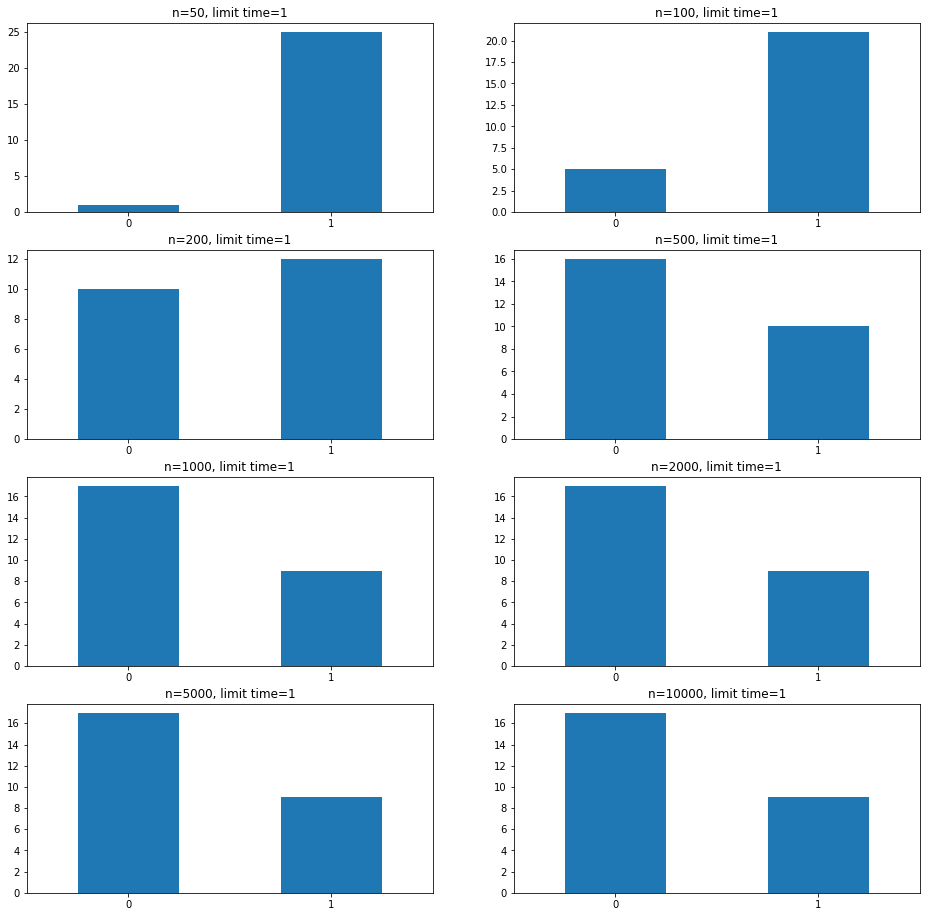

In [10]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([50, 100, 200, 500, 1000, 2000, 5000, 10000], [1]*8), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

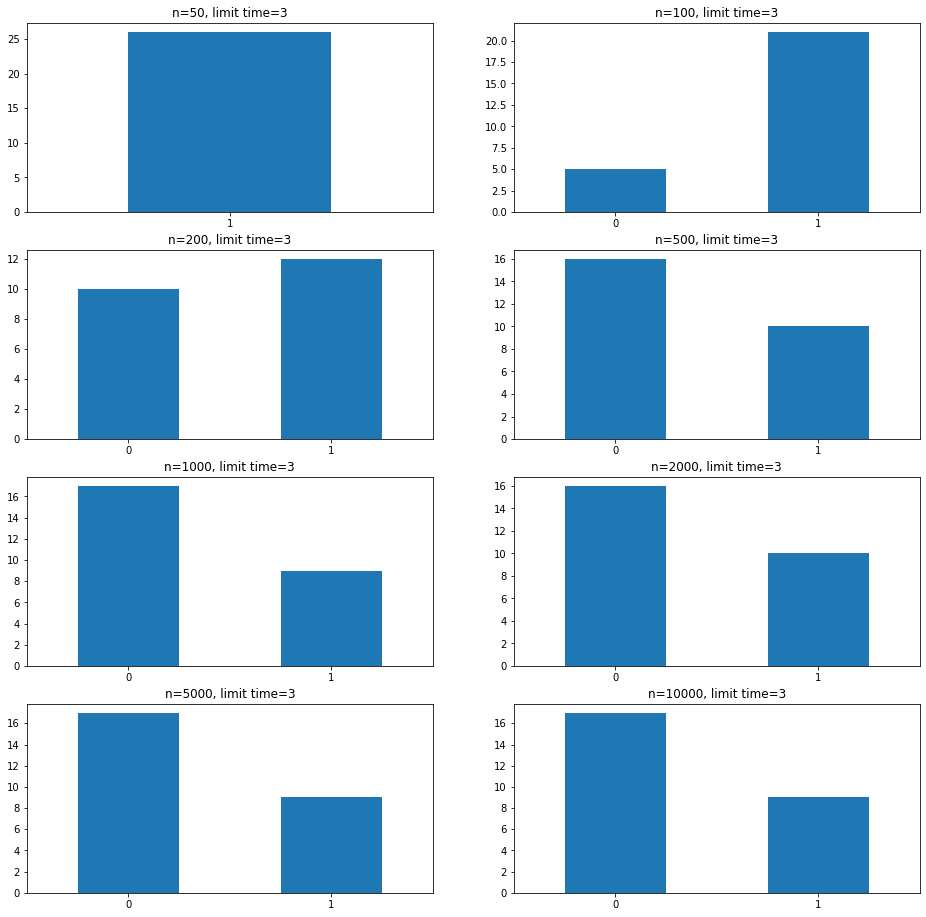

In [11]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([50, 100, 200, 500, 1000, 2000, 5000, 10000], [3]*8), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

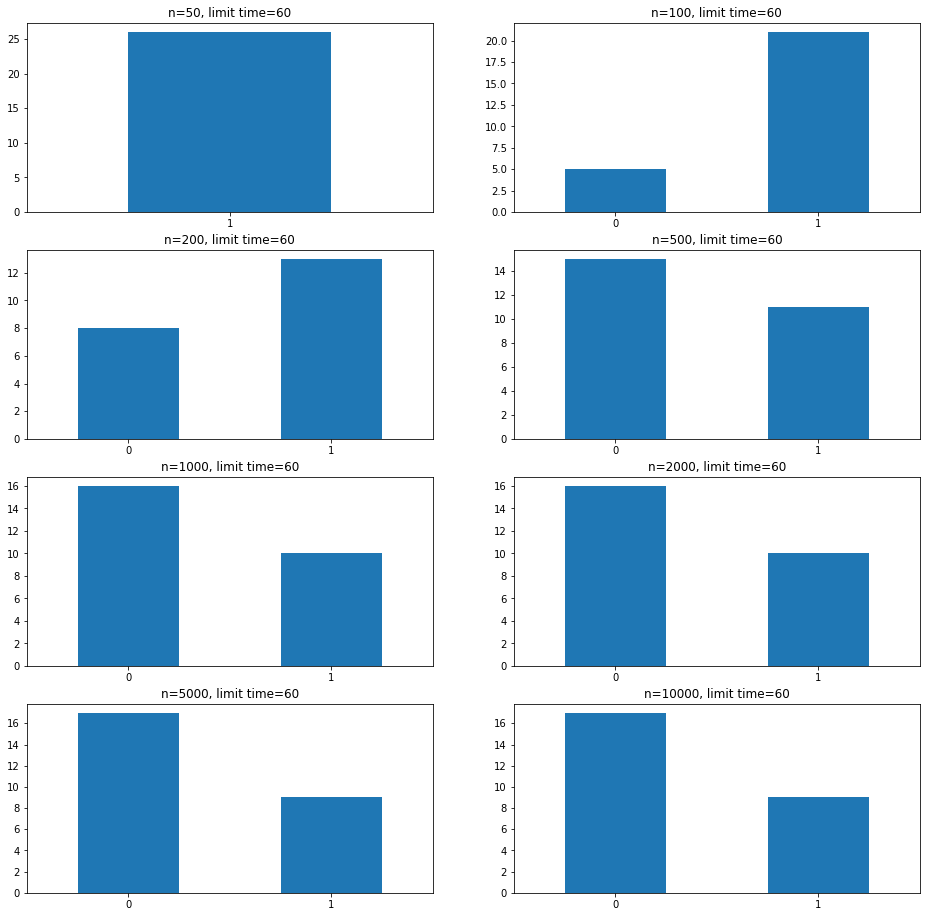

In [12]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([50, 100, 200, 500, 1000, 2000, 5000, 10000], [60]*8), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

## Observe the ability to find the optimal value for input size 10000 when the limit time increase

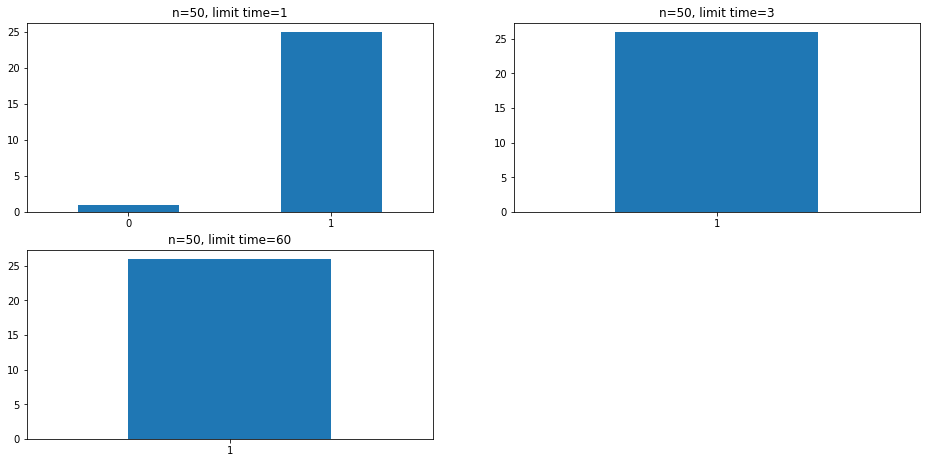

In [13]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([50]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

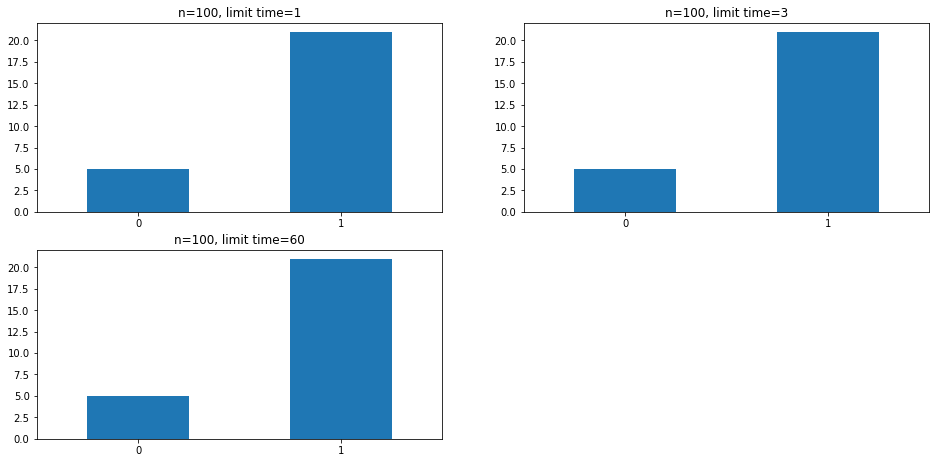

In [14]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([100]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

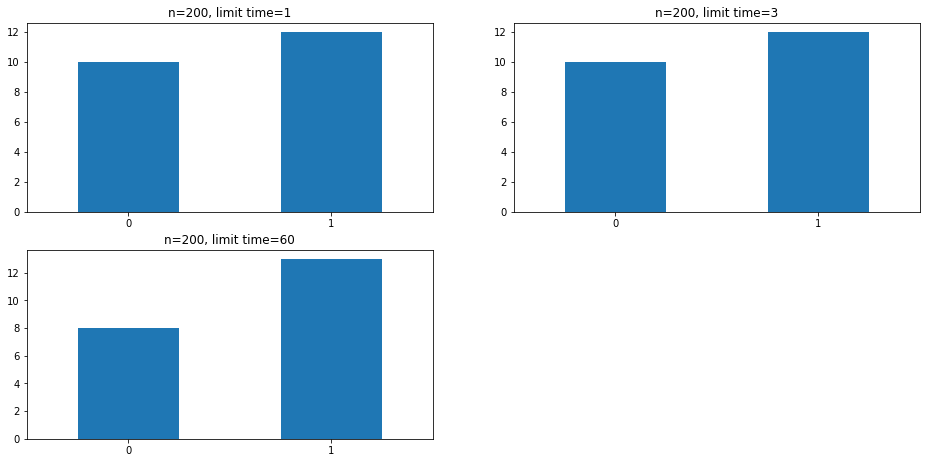

In [15]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([200]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

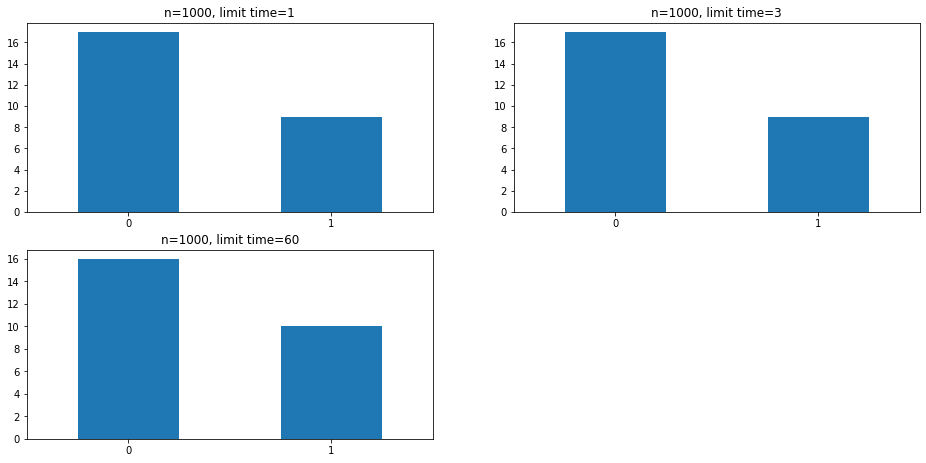

In [16]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([1000]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

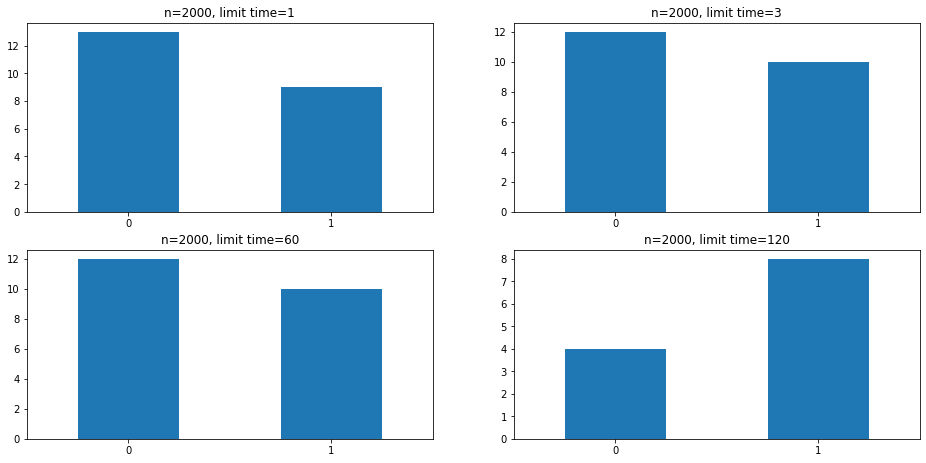

In [34]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([2000]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

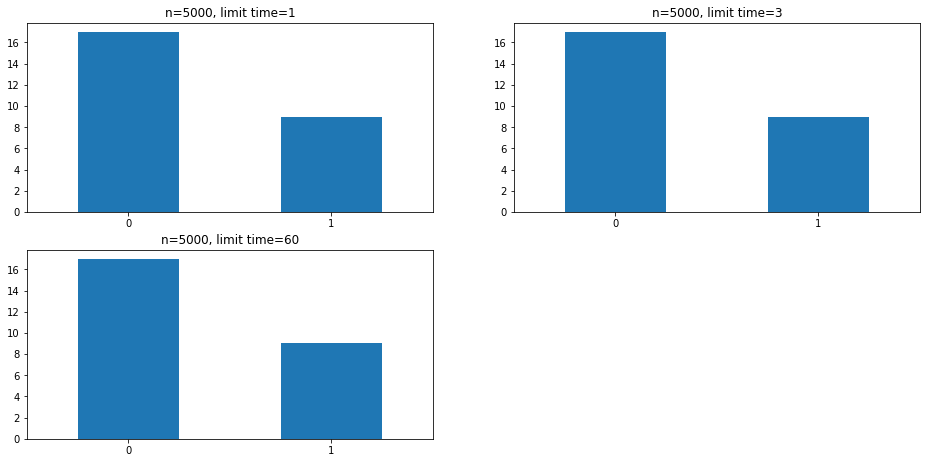

In [18]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([5000]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

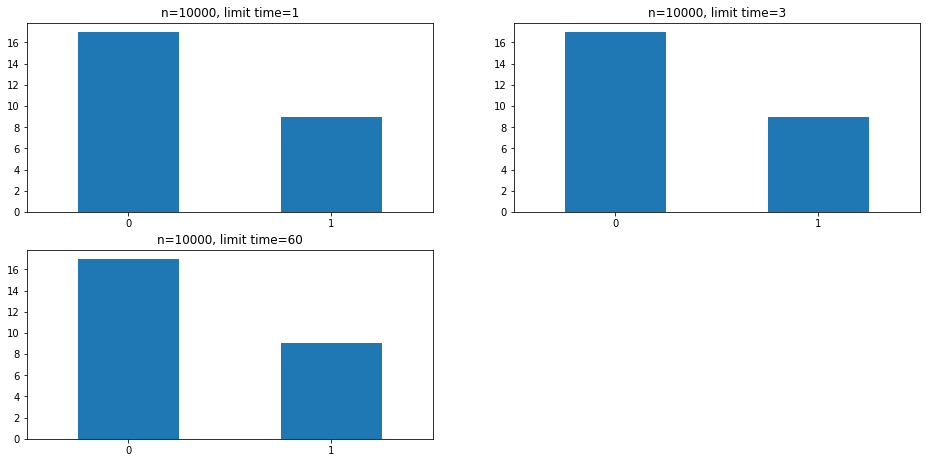

In [17]:
plt.figure(figsize=(16, 16))

for i, (n, limit_time) in enumerate(zip([10000]*5, [1, 3, 60]), 1):
        plt.subplot(4, 2, i)
        (df[(df["limit time"] == limit_time) & (df["n"] == n)]["is optimal"]).value_counts().sort_index().plot(kind="bar")
        plt.title(f"n={n}, limit time={limit_time}")
        plt.xticks(rotation=0)

## Analyse results for each test case

In [24]:
def gather(namecase, data):
    _case = {
        "name": namecase,
        "values": [],
        "weights": [],
        "total_optimals": 0
    }
    for ncase in data[namecase].values():
        for case in ncase.values():
            for subcase in case:
                if subcase["limit_time"] == 60:
                    _case["values"].append(subcase["total_value"])
                    _case["weights"].append(subcase["total_weight"])
                    _case["total_optimals"] += subcase["is_optimal"]

    return _case

In [25]:
case_names = {0: "00Uncorrelated", 1: "01WeaklyCorrelated", 2: "02StronglyCorrelated", 3: "03InverseStronglyCorrelated", 4: "04AlmostStronglyCorrelated", 5: "05SubsetSum", 
                6: "06UncorrelatedWithSimilarWeights", 7: "07SpannerUncorrelated", 8: "08SpannerWeaklyCorrelated", 9: "09SpannerStronglyCorrelated", 
                10: "10MultipleStronglyCorrelated", 11: "11ProfitCeiling", 12: "12Circle"}

In [27]:
cases = []
for case_name in case_names.values():
    cases.append(gather(case_name, data))

Text(0.5, 1.0, 'Optimal results per test case.')

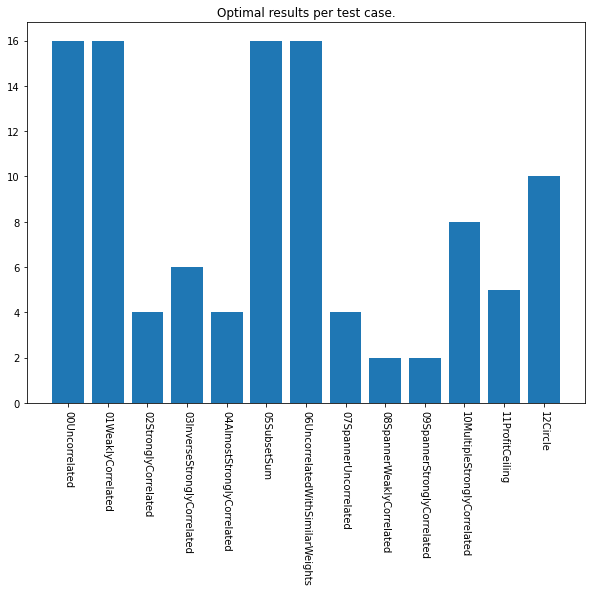

In [44]:
plt.figure(figsize=(10, 7))

plt.bar(case_names.values(), [case["total_optimals"] for case in cases])
plt.xticks(rotation=-90)
plt.title("Optimal results per test case.")

In [55]:
import numpy as np

table = pd.DataFrame({
    "Case Name": [case["name"] for case in cases], 
    "Avg. Value": [np.array(case["values"]).mean() for case in cases],
    "Avg. Weight": [np.array(case["weights"]).mean() for case in cases],
    "Total Optimal": [case["total_optimals"] for case in cases]
})
table

,Case Name,Avg. Value,Avg. Weight,Total Optimal
0,00Uncorrelated,5.245165e+06,3.211747e+06,16
1,01WeaklyCorrelated,3.556606e+06,3.220100e+06,16
2,02StronglyCorrelated,4.669272e+06,3.639929e+06,4
3,03InverseStronglyCorrelated,3.450933e+06,3.860427e+06,6
4,04AlmostStronglyCorrelated,4.129687e+06,3.219389e+06,4
5,05SubsetSum,3.220104e+06,3.220104e+06,16
6,06UncorrelatedWithSimilarWeights,8.294000e+05,7.720724e+07,16
7,07SpannerUncorrelated,1.581042e+06,1.327674e+06,4
8,08SpannerWeaklyCorrelated,2.292496e+06,1.261040e+06,2
9,09SpannerStronglyCorrelated,5.147028e+06,1.261009e+06,2
